In [ ]:
!pip install -q oauth2client==1.5.2
import sys
sys.path.append("./utils/student_function/")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

## Ejercicio 1

Implementa al algoritmo de Dijsktra según la descripción más abajo. Las siguientes funciones te serán de ayuda para crear grafos aleatorios y visualizar grafos

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def create_random_graph(directed=False, w_size=200, n_cities=7, prob_connected=0.5):
    import itertools
    cities = (np.random.random((n_cities,2))*w_size).astype(int)
    g = nx.DiGraph() if directed else nx.Graph()
    
    for node_id, location in enumerate(cities):
        g.add_node(node_id, pos=location)
    for i,j in itertools.product(range(len(cities)), range(len(cities))):
        if i<j and np.random.random()<prob_connected:
            g.add_edge(i,j,weight=np.round(np.linalg.norm(cities[i]-cities[j]),2))    
            if directed and np.random.random()>.5:
                g.add_edge(j,i,weight=np.round(np.linalg.norm(cities[i]-cities[j]),2))    
                
    return g

def draw_graph(g,node_size=500, font_color="white", 
               show_edge_labels=True, edge_units=" km",
               x_units="km lon", y_units="km lat"):
    positions = {i: g.nodes[i]["pos"] for i in g.nodes} if "pos" in [k for k in g.nodes.values()][0].keys() else None
    nx.drawing.draw(g, with_labels=True, pos=positions,
                    node_alpha=.5, node_color="blue", width=2,
                    node_size=node_size, font_color=font_color)   
    if show_edge_labels and positions is not None:
        nx.draw_networkx_edge_labels(g, pos=positions,
                                     edge_labels={i:"%.1f%s"%(g.get_edge_data(*i)["weight"],edge_units) for i in g.edges});
        plt.axis("on")
        plt.xlabel(x_units)
        plt.ylabel(y_units)
        plt.grid()
    plt.axis("equal");


**INPUT**:

- `nodes`: una lista con los nombres de los nodos
- `edges`: un diccionario con:
    - **key** una tupla con los nodos que participan en un _edge_
    - **value** el peso (distancia) de ese _edge_
- `start`: el nodo desde el que se quiere empezar
- `target`: el nodo al que se quiere llegar

observa que estamos con un **grafo dirigido**. Observa el ejemplo más abajo para ver cómo serían `edges` y `nodes`

**VARIABLES**:

puedes usar dos diccionarios para llevar la cuenta del progreso del algoritmo

- `mincost`: un diccionario con un **key** por cada nodo cuyo valor asociado va a ser el coste (distancia) mínimo que vamos calculando desde `start` hasta el el nodo **key**
- `confirmed`: un diccionario con un **key** por cada nodo cuyo valor asociado será `True` o `False` que indique de qué nodos ya sabemos el coste mínimo de llegar desde `start`

por ejemplo

- valor de `confirmed` : `{0: False, 1: True, 2: True, 3: True, 4: False, 5: False}`
- valor de `mincost`: `{0: inf, 1: 0, 2: 146.24, 3: 168.91000000000003, 4: inf, 5: 255.36}`

indica que:

- **ya sabemos** que el coste menor de llegar al nodo 3 desde `start` es de 168.91
- **ya sabemos** que el coste menor de llegar al nodo 2 desde `start` es de 146.24
- el nodo `start` es el nodo 1, ya que el costo de llegar a él es de 0
- todavía **no sabemos** cómo llegar a los nodos 0 y 4 (o si esto es posible) ya que su valor es `inf`
- existe un camino de llegada al nodo 5 con coste 255.36 pero todavía **no sabemos** si habrá otro camino menos costoso.

 
**PSEUDOCÓDIGO**:

1. inicializar el diccionario **mincost** con el coste del _edge_ (`start`, **nodo**) para cualquier **nodo** directamente conectado con `start` y con `inf` para cualquier otro nodo
1. inicializar el diccionario **confirmed** con todos los nodos a `False` excepto el nodo `start` que se establece a `True`
1. repetir tantas veces como número de nodos menos 1:

    1. escoger nodo `w` tal que `mincost[w]` sea el menor de los elementos de `mincost` cuyo `confirmed[w]` sea Falso
    1. `confirmed[w]` $\leftarrow$ `True`
    1. para todo nodo `k` con `confirmed[k]=False`:
    
             mincost[k]:= min(mincost[k], mincost[k] + edges[(w,k)])

donde tienes que tener en cuenta que `edges[(w,k)]` no estará definido para los casos en los que no hay un _edge_ entre `w` y `k` (que es equivalente a que su coste fuera infinito)

**OUTPUT**:

el coste $\in \mathbb{R}$ más pequeño de viajar desde `start` hasta `target`, este coste se encuentra en `mincost[target]`

Fíjate cómo verías en `edges` y `nodes` el siguiente grafo.


**** ESTA SERIA LA ENTRADA A TU FUNCION ****

nodes ['S', 'A', 'B', 'C', 'D']
edges {('S', 'A'): 5, ('S', 'B'): 10, ('A', 'B'): 3, ('A', 'C'): 7, ('A', 'D'): 12, ('B', 'D'): 1}


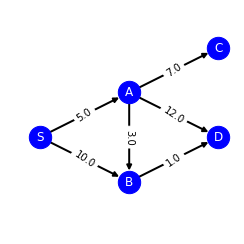

In [7]:
g = create_random_graph(n_cities=6, prob_connected=.7, directed=True)
g = nx.DiGraph()
g.add_node("S", pos=(0,5))
g.add_node("A", pos=(10,10))
g.add_node("B", pos=(10,0))
g.add_node("C", pos=(20,15))
g.add_node("D", pos=(20,5))

g.add_edge("S","A", weight=5)
g.add_edge("S","B", weight=10)
g.add_edge("A","B", weight=3)
g.add_edge("A","C", weight=7)
g.add_edge("A","D", weight=12)
g.add_edge("B","D", weight=1)

plt.figure(figsize=(3,3))
draw_graph(g, edge_units="")
plt.axis("off")

nodes = [i for i in g.nodes.keys()]
edges = {k:v["weight"] for k,v in g.edges.items()}

print("\n**** ESTA SERIA LA ENTRADA A TU FUNCION ****\n")
print("nodes", nodes)
print("edges", edges)

In [4]:
%%writefile utils/student_function/PS10_01.py
import numpy as np
def dijkstra_shortest_path(nodes, edges, start, target):
    
    # inicializacion
    mincost   = #... TU CODIGO AQUI ...    
    confirmed = #... TU CODIGO AQUI ...
    
    for _ in range(len(nodes)-1):
        
        # .. TU CODIGO AQUI ...
        # PASOS 3.A y 3.B del pseudocodigo
        
        for k in nodes:
            
            # ... TU CODIGO AQUI ...
            # PASO 3.C del pseudocodigo
            
    return mincost[target]

Writing utils/student_function/PS10_01.py


comprueba tu código. Observa cómo creamos un grafo aleatorio y seleccionamos también aleatoriamente nodos a los que medirle la distancia más corta. Comparando esa métrica con lo devuelto por `networx`, debería de dar el mismo valor. Incluyendo los infititos.

In [8]:
import PS10_01 as st
import importlib
importlib.reload(st)

g = create_random_graph(n_cities=10, prob_connected=.4, directed=True)
draw_graph(g, edge_units="")
plt.axis("off")

print("correct  networkx  tu_implementacion")

for _ in range(10):
    source, target = 5, 2
    source, target = np.random.permutation(g.nodes)[:2]
    try:
        nd = nx.dijkstra_path_length(g, source, target)
    except nx.NetworkXNoPath:
        nd = np.inf

    nodes = [i for i in g.nodes.keys()]
    edges = {k:v["weight"] for k,v in g.edges.items()}
    md = st.dijkstra_shortest_path(nodes, edges, source, target)
    print(nd==md, "%12.2f"%nd,"%12.2f"%md)

ModuleNotFoundError: No module named 'PS10_01'

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS10_01 

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS10_01 

## Ejercicio 2

Implementa el algoritmo de Dijkstra que además de calcular la longitud del camino más corto, obtenga los nodos por los que ese camino pasa.

**ESTRATEGIA SUGERIDA**

Observa que cada vez que modificamos `mincost[k]` en el paso 3.C del pseudocódigo anterior, es que hemos encontrado un camino más corto hasta el nodo `k` desde `mincost[w]` (respecto a lo que conocemos en este punto del algoritmo). Es decir, que **el camino más corto para llegar a `k`, pasa por `w` justo antes de llegar a `k`**.

Por tanto, si guardamos el valor de `w` cada vez que actualizamos `mincost` tendremos, para cada nodo, cual es el nodo inmediatamente anterior en el camino más corto.

Mantendremos entonces una variable `wayto` que contenga un diccionario con un **key** por cada nodo cuyo valor asociado va a ser el nodo por el que se pasó inmediatamente antes de llegar al nodo **key**  por el camino más corto.

En el **paso 1** del pseudocódigo inicializamos `wayto` de modo que `wayto[i]=start` si hay un camino directo de `start` a `i`. En otro caso, establecemos `wayto[i]=None`

En el **paso 3.C**, cuando actualizemos `mincost[k]` para algún nodo `k`, actualizamos también `wayto[k]=w`, en cualquier otro caso, no tocamos `wayto`.

Con esto, tendremos al final del proceso por ejemplo un `wayto` con el siguiente contenido, con `start=6` y `target=5`:

    {0: 9, 1: 7, 2: 7, 3: 0, 4: 7, 5: 4, 6: None, 7: 6, 8: 3, 9: 6}

esto indica que:

- el camino más corto para llegar al 5 pasa inmediatamente antes por el 4
- el camino más corto para llegar al 4 pasa inmediatamente antes por el 7
- el camino más corto para llegar al 7 pasa inmediatemente antes por el 6, que es nuestro `start`

por tanto, el camino más corto para llegar desde el 6 al 5 es `[6,7,4,5]`

Como último paso tendrás que reconstruir el `path` desde `wayto` antes de acabar tu algoritmo y adjuntarlo al valor de retorno.

In [ ]:
%%writefile utils/student_function/PS10_02.py
import numpy as np
def dijkstra_shortest_path(nodes, edges, start, target):
    
    # inicializacion
    mincost   = #... TU CODIGO AQUI ...    
    confirmed = #... TU CODIGO AQUI ...
    wayto     = #... TU CODIGO AQUI ...
    
    for _ in range(len(nodes)-1):
        
        # .. TU CODIGO AQUI ...
        # PASOS 3.A y 3.B del pseudocodigo
        
        for k in nodes:
            
            # ... TU CODIGO AQUI ...
            # PASO 3.C del pseudocodigo .. acuerdate de actualizar wayto

    path = # ... RECONSTRUYE EL PATH DESDE wayto ...
    return mincost[target], path

prueba tu código. observa el grafo generado y prueba con distintos `start` y `target`

In [ ]:
import PS10_02 as st
import importlib
importlib.reload(st)
g = create_random_graph(n_cities=10, prob_connected=.4, directed=True)
nodes = [i for i in g.nodes.keys()]
edges = {k:v["weight"] for k,v in g.edges.items()}


draw_graph(g, edge_units="")
source, target = 6, 5
#source, target = 4,3
print("ST", st.dijkstra_shortest_path(nodes, edges, source, target))
print("NX", (nx.dijkstra_path_length(g, source, target), nx.dijkstra_path(g,source,target)))

prueba tu código de manera más exhausitva. Obseva cómo generamos grafos y `start`, `target` aleatorios y se compara tu resultado con el de `networkx`. Tu columna `correct` ha de estar siempre a `True`. Si no, observa el caso en el que no sea así y revisa tu implementación.

In [ ]:
import PS10_02 as st
import importlib
importlib.reload(st)

g = create_random_graph(n_cities=15, prob_connected=.2, directed=True)
plt.figure(figsize=(7,7))
draw_graph(g, edge_units="", show_edge_labels=False)
plt.axis("off")

print("src tgt correct      networkx                        tu_implementacion")

for _ in range(20):
    source, target = np.random.permutation(g.nodes)[:2]
    try:
        ndist = nx.dijkstra_path_length(g, source, target)
        npath = nx.dijkstra_path(g, source, target)
    except nx.NetworkXNoPath:
        npath = []
        ndist = np.inf
    
    nodes = [i for i in g.nodes.keys()]
    edges = {k:v["weight"] for k,v in g.edges.items()}
    mdist,mpath = st.dijkstra_shortest_path(nodes, edges, source, target)
    ok = (mdist==ndist) and (len(npath)==len(mpath)) and np.allclose(mpath, npath)
    print("%3d"%source, "%3d"%target, ok, "%12.2f %20s"%(ndist,npath),"%12.2f %20s"%(mdist, mpath))

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS10_02

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS10_02

## Ejercicio 3

Realiza la implementación del algoritmo de Floyd-Warshal que nos devuelve una matriz con el camino más corto entre todos los nodos. Si $n$ es el número de nodos del grafo, tu solución ha de devolver un `pandas.DataFrame`  de $n\times n$ en el que las columnas y los índices son los nodos.

Lee la [descripción del algoritmo en Wikipedia](https://www.wikiwand.com/es/Algoritmo_de_Floyd-Warshall) para adquirir una intuición de cómo se implementa.

#### SUGERENCIA DE IMPLEMENTACIÓN

- usa [`collections.defaultdict`](https://www.accelebrate.com/blog/using-defaultdict-python/) para crear un diccionario llamado `mincost` con el mismo contenido de `edges` pero con un valor por defecto `np.inf` para cualquier par de nodos que que inicialmente no esté en edges.

- implementa el siguiente pseudocódigo:

      mincost es un defaultdict inicializado vacío
      para cada edge entre nodos i,j:
           mincost[(i,j)] = edges[(i,j)]
           
      para cada nodo k:
          para cada nodo i:
              para cada nodo j:
                  costo_ijk = mincost[(i,k)]+mincost[(k,j)]
                  if costo_ijk < mincost[(i,j)]:
                       mincost[(i,j)] = cost_ijk
                       
      establece el valor 0 para mincost[(t,t)] para cada nodo t
      
      construye una matriz de n x n con los contenidos de mincost.
      construye un dataframe de pandas según indicado.



In [ ]:
%%writefile utils/student_function/PS10_03.py
import numpy as np
import pandas as pd
from collections import defaultdict

def floyd_warshall(nodes, edges):
    
    n_edges = len(edges)
    mincost = defaultdict(lambda: np.inf)
    # 1. construye el mincost inicial

    # 2. realiza el triple bucle para actualizar el mincost de cada nodo

    # 3. establece mincost[(t,t)]=0 para todos los nodos

    # 4. constriuye un pandas dataframe segun indicado

    result = pd.DataFrame ( # ... TU CODIGO AQUI .... )
    return rr

prueba tu código con algún grafo sencillo

In [ ]:
import PS10_03 as st
import importlib
importlib.reload(st)

g = create_random_graph(n_cities=10, prob_connected=.4, directed=True)
nodes = [i for i in g.nodes.keys()]
edges = {k:v["weight"] for k,v in g.edges.items()}
draw_graph(g, edge_units="")


nodes = [i for i in g.nodes.keys()]
edges = {k:v["weight"] for k,v in g.edges.items()}

stfw = st.floyd_warshall(nodes, edges)
nxfw = np.array(nx.floyd_warshall_numpy(g))

print("TU SOLUCION")
print(stfw.values)
print("\nNETWORKX")
print(nxfw)
print("\nCOMPARATIVA:", np.allclose(stfw.values, nxfw))

prueba tu código de manera más exhaustiva

In [ ]:
import PS10_03 as st
import importlib
importlib.reload(st)

for _ in range(20):
    g = create_random_graph(n_cities=np.random.randint(20)+5, prob_connected=.3, directed=True)
    
    nxfw = np.array(nx.floyd_warshall_numpy(g))
    
    nodes = [i for i in g.nodes.keys()]
    edges = {k:v["weight"] for k,v in g.edges.items()}
    stfw = st.floyd_warshall(nodes, edges)
    
    ok = np.allclose(nxfw, stfw.values)
    if not ok:
        print("*** INCORRECT RESULT ON GRAPH ***")
        print("graph")
        print(nodes)
        print(edges)
        print("TU SOLUCION")
        print(stfw)
        print("\nNETWORKX")
        print(nxfw)
        print("\nCOMPARATIVA:", np.allclose(stfw, nxfw))
    else:
        print("ok", end=' ')

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS10_03

#### submit your answer (you must be connected to internet)

In [ ]:
!./run SUBMIT_SOLUTION PS10_03